In [60]:
import pandas as pd
import numpy as np
import pickle
from sklearn.cluster import KMeans
!pip install wordcloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt 

**Affine clustering based on cosine similarity**

In [79]:
movies_new = pd.read_pickle('Preprocessed.pickle')
movies_new.head()
movies_new.drop(['plot','genre'],axis=1)

,movie_id,movie_name,genre_new,clean_plot
0,23890098,Taxi Blues,"[drama, world cinema]",shlykov hard working taxi driver lyosha saxoph...
1,31186339,The Hunger Games,"[action/adventure, science fiction, action, dr...",nation panem consists wealthy capitol twelve p...
2,20663735,Narasimham,"[musical, action, drama, bollywood]",poovalli induchoodan sentenced six years priso...
3,2231378,The Lemon Drop Kid,"[screwball comedy, comedy]",lemon drop kid new york city swindler illegall...
4,595909,A Cry in the Dark,"[crime fiction, drama, docudrama, world cinema...",seventh day adventist church pastor michael ch...
5,5272176,End Game,"[thriller, action/adventure, action, drama]",president way give speech traveling man shows ...
6,1952976,Dark Water,"[thriller, drama, horror]",plot film opens young girl dahlia stands outsi...
7,24225279,Sing,"[drama, teen]",story begins hannah young jewish teen completi...
8,2462689,Meet John Doe,"[romantic comedy, media satire, americana, com...",infuriated told write one final column laid ne...
9,20532852,Destination Meatball,"[short film, family film, animation]",line people drool window shop market butcher b...


In [62]:
#import gensim
#from gensim import corpora
genlist=[]
#print(len(movies_new['genre_new']))
for i in range(41793):
  try:
    
    #print(movies_new['genre_new'][i])
    t=movies_new['genre_new'][i]
    genlist.append(t)
  except:
    continue
      
print(genlist)  

[['drama', 'world cinema'], ['action/adventure', 'science fiction', 'action', 'drama'], ['musical', 'action', 'drama', 'bollywood'], ['screwball comedy', 'comedy'], ['crime fiction', 'drama', 'docudrama', 'world cinema', 'courtroom drama'], ['thriller', 'action/adventure', 'action', 'drama'], ['thriller', 'drama', 'horror'], ['drama', 'teen'], ['romantic comedy', 'media satire', 'americana', 'comedy-drama', 'black-and-white', 'drama', 'comedy', 'romance film'], ['short film', 'family film', 'animation'], ['comedy'], ['crime fiction', 'drama', 'comedy', 'world cinema'], ['parody', 'comedy'], ['war film', 'epic', 'action/adventure', 'period piece', 'drama', 'film adaptation', 'action', 'political drama'], ['cult', 'coming of age', 'comedy', 'teen'], ['horror'], ['thriller', 'mystery', 'comedy film', 'crime fiction', 'horror'], ['drama'], ['thriller', 'crime fiction', 'indie', 'martial arts film', 'romance film', 'action'], ['period piece', 'drama', 'indie'], ['drama', 'war film'], ['comp

In [80]:
listuni=[]
for i in genlist:
  for j in i:
    listuni.append(j)
listunique=set(listuni)
listunique=list(listunique)
print('Unique genres: ',len(listunique))

print(listunique)

Unique genres:  363
['crime comedy', 'british empire film', 'horse racing', 'jungle film', 'parody', 'avant-garde', 'anime', 'mockumentary', 'costume adventure', 'lgbt', 'plague', 'crime thriller', 'breakdance', 'demonic child', 'road movie', 'softcore porn', 'czechoslovak new wave', 'biker film', 'buddy film', 'c-movie', 'malayalam cinema', 'fairy tale', 'christian film', 'point of view shot', 'gross-out film', 'media studies', 'slasher', 'suspense', 'combat films', 'neorealism', 'propaganda film', 'courtroom drama', 'disaster', 'family & personal relationships', "children's entertainment", 'bengali cinema', 'chick flick', 'female buddy film', 'romantic fantasy', 'bollywood', 'reboot', 'animals', 'private military company', 'clay animation', 'health & fitness', 'prison escape', 'latino', 'hardcore pornography', 'sex comedy', 'martial arts film', 'gangster film', 'science fiction western', 'psychological thriller', 'star vehicle', 'apocalyptic and post-apocalyptic fiction', 'erotic thr

In [0]:
def build_gender_row(genre_list, all_genres=listunique):
    row_movie_gender = pd.Series(0, index=all_genres)
    row_movie_gender[genre_list]=1
    return row_movie_gender 

  
genres = pd.DataFrame([build_gender_row(e) for e in genlist])  
#One hot encoding the dataset and creating a dataframe on that

In [82]:
genres.head()

,crime comedy,british empire film,horse racing,jungle film,parody,avant-garde,anime,mockumentary,costume adventure,lgbt,plague,crime thriller,breakdance,demonic child,road movie,softcore porn,czechoslovak new wave,biker film,buddy film,c-movie,malayalam cinema,fairy tale,christian film,point of view shot,gross-out film,media studies,slasher,suspense,combat films,neorealism,propaganda film,courtroom drama,disaster,family & personal relationships,children's entertainment,bengali cinema,chick flick,female buddy film,romantic fantasy,bollywood,...,screwball comedy,pre-code,war effort,jukebox musical,holiday film,film noir,culture & society,outlaw,detective,boxing,libraries and librarians,news,heavenly comedy,sports,costume horror,juvenile delinquency film,z movie,supermarionation,caper story,gay pornography,historical fiction,zombie film,gender issues,revenge,tragicomedy,animation,sexploitation,crime fiction,tokusatsu,romantic drama,exploitation,comedy,space western,docudrama,coming of age,remake,computer animation,kafkaesque,music,statutory rape
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0


In [0]:
from sklearn.metrics.pairwise import cosine_similarity

In [84]:
genres_sim = pd.DataFrame(cosine_similarity(genres.T))
genres_sim.columns = genres.columns
genres_sim.index = genres.columns

genres_sim

,crime comedy,british empire film,horse racing,jungle film,parody,avant-garde,anime,mockumentary,costume adventure,lgbt,plague,crime thriller,breakdance,demonic child,road movie,softcore porn,czechoslovak new wave,biker film,buddy film,c-movie,malayalam cinema,fairy tale,christian film,point of view shot,gross-out film,media studies,slasher,suspense,combat films,neorealism,propaganda film,courtroom drama,disaster,family & personal relationships,children's entertainment,bengali cinema,chick flick,female buddy film,romantic fantasy,bollywood,...,screwball comedy,pre-code,war effort,jukebox musical,holiday film,film noir,culture & society,outlaw,detective,boxing,libraries and librarians,news,heavenly comedy,sports,costume horror,juvenile delinquency film,z movie,supermarionation,caper story,gay pornography,historical fiction,zombie film,gender issues,revenge,tragicomedy,animation,sexploitation,crime fiction,tokusatsu,romantic drama,exploitation,comedy,space western,docudrama,coming of age,remake,computer animation,kafkaesque,music,statutory rape
crime comedy,1.000000,0.000000,0.000000,0.000000,0.045604,0.000000,0.000000,0.013419,0.000000,0.013880,0.000000,0.025857,0.0,0.000000,0.020413,0.000000,0.000000,0.000000,0.051798,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.005192,0.000000,0.0,0.000000,0.004912,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.008169,...,0.054884,0.005796,0.000000,0.000000,0.006852,0.000000,0.000000,0.000000,0.023737,0.009253,0.029553,0.000000,0.000000,0.007670,0.000000,0.020393,0.000000,0.000000,0.221645,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.001343,0.000000,0.146207,0.0,0.002618,0.000000,0.143495,0.000000,0.008342,0.002434,0.007210,0.000000,0.000000,0.003532,0.000000
british empire film,0.000000,1.000000,0.000000,0.028630,0.000000,0.000000,0.000000,0.000000,0.051988,0.007828,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.008784,0.000000,0.0,0.000000,0.049862,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.064336,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.010307,0.0,0.008858,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
horse racing,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.068397,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.006948,0.000000,0.022316,0.026047,0.000000,0.000000,0.000000,0.000000,0.000000
jungle film,0.000000,0.028630,0.000000,1.000000,0.009301,0.014054,0.000000,0.013000,0.029768,0.004482,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.007169,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.005030,0.005030,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.011230,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.007368,0.000000,0.000000,0.0,0.000000,0.002603,0.000000,0.000000,0.0,0.007608,0.000000,0.008806,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
parody,0.045604,0.000000,0.000000,0.009301,1.000000,0.003987,0.000000,0.110637,0.012667

In [85]:
#Finding columns with very high cosine similarity
df = genres_sim.where(np.triu(np.ones(genres_sim.shape), 1).astype(np.bool))
df = df.stack().reset_index()
df.columns = ['Row','Column','Value']
df.sort_values('Value', ascending = False).head(10)

,Row,Column,Value
8618,gross-out film,gross out,1.000000
36941,gay,gay interest,0.995316
24423,anti-war film,anti-war,0.952501
36930,gay,gay themed,0.906490
61435,gay themed,gay interest,0.906480
1970,avant-garde,experimental film,0.880739
24055,detective fiction,detective,0.869972
36558,film,film & television history,0.691714
60719,social issues,culture & society,0.668418
53149,superhero,superhero movie,0.630439


In [96]:
from sklearn.cluster import AffinityPropagation
import numpy as np

clustering = AffinityPropagation(affinity='precomputed',max_iter=200,convergence_iter=10).fit(genres_sim)
clustering 
cluster_centers_indices = clustering.cluster_centers_indices_
labels = clustering.labels_

n_clusters_ = len(cluster_centers_indices)
print('No. of clusters: ',n_clusters_)

No. of clusters:  68


In [87]:
aux = pd.DataFrame(clustering.labels_)
aux.index = genres.columns
print(aux.sort_values(0))
print(aux.shape[0])


                             0
surrealism                   0
experimental film            0
czechoslovak new wave        0
essay film                   0
avant-garde                  0
breakdance                   1
hip hop movies               1
dance                        1
biker film                   2
outlaw biker film            2
point of view shot           3
archives and records         3
neorealism                   4
patriotic film               4
propaganda film              4
parkour in popular culture   5
reboot                       5
action comedy                6
chinese movies               6
samurai cinema               6
bruceploitation              6
wuxia                        6
ninja movie                  6
martial arts film            6
historical documentaries     6
children's fantasy           7
children's entertainment     7
animal picture               7
children's                   7
fairy tale                   7
...                         ..
short fi

In [0]:
#Dictionary created with key as the genre name and the value being the cluster number
diction={}
for i in range(aux.shape[0]):
  diction[aux.index[i]]=str(aux[0][i])

In [72]:
print(len(diction))

363


In [89]:
#Function to replace genres with their cluster number in the 'genre_new' column
def funcone(x):
  y = []
  for genre in x:
    try:
      y.append(diction[str(genre)])
    except:
      continue
  return y

print(funcone(['hagiography','chase movie','outlaw','drama','comedy']))

['51', '11', '58', '55', '67']


In [0]:
#Function to replace repeated occurence of same cluster fora given dataset
def func4(x):
  
  y=set(x)
  x=list(y)
  return x

In [90]:
movies_new['genre_new'].head()

0                                [drama, world cinema]
1    [action/adventure, science fiction, action, dr...
2                  [musical, action, drama, bollywood]
3                           [screwball comedy, comedy]
4    [crime fiction, drama, docudrama, world cinema...
Name: genre_new, dtype: object

In [91]:
movies_new['genre_new']=movies_new['genre_new'].apply(lambda x : funcone(x))
movies_new['genre_new'].head(10)

0                            [55, 55]
1                    [11, 26, 11, 55]
2                    [35, 11, 55, 35]
3                            [67, 67]
4                [22, 55, 52, 55, 55]
5                    [22, 11, 11, 55]
6                        [22, 55, 26]
7                            [55, 26]
8    [67, 54, 38, 38, 34, 55, 67, 55]
9                        [65, 65, 65]
Name: genre_new, dtype: object

In [77]:
movies_new['genre_new']=movies_new['genre_new'].apply(lambda x : func4(x))
#movies_new.to_csv('DFupdated.csv')/
print(movies_new['genre_new'])


0                            [55]
1                    [11, 26, 55]
2                    [35, 11, 55]
3                            [67]
4                    [52, 22, 55]
5                    [11, 22, 55]
6                    [26, 22, 55]
7                        [26, 55]
8            [38, 54, 67, 34, 55]
9                            [65]
10                           [67]
11                   [22, 67, 55]
12                           [67]
13               [11, 16, 55, 51]
14                   [38, 26, 67]
15                           [26]
16                   [26, 65, 22]
17                           [55]
18                [11, 6, 22, 55]
19                           [55]
20                       [16, 55]
21                           [65]
22                           [55]
23                       [11, 55]
24                       [57, 55]
25                           [55]
27                   [34, 65, 67]
28                       [65, 55]
29                   [35, 67, 55]
30            

In [0]:
movies_new.to_pickle('my_df.pickle')

**KMeans clustering approach**

In [39]:
movies_new1 = pd.read_pickle('Preprocessed.pickle')
movies_new1.head()
movies_new1.drop(['plot','genre'],axis=1)

,movie_id,movie_name,genre_new,clean_plot
0,23890098,Taxi Blues,"[drama, world cinema]",shlykov hard working taxi driver lyosha saxoph...
1,31186339,The Hunger Games,"[action/adventure, science fiction, action, dr...",nation panem consists wealthy capitol twelve p...
2,20663735,Narasimham,"[musical, action, drama, bollywood]",poovalli induchoodan sentenced six years priso...
3,2231378,The Lemon Drop Kid,"[screwball comedy, comedy]",lemon drop kid new york city swindler illegall...
4,595909,A Cry in the Dark,"[crime fiction, drama, docudrama, world cinema...",seventh day adventist church pastor michael ch...
5,5272176,End Game,"[thriller, action/adventure, action, drama]",president way give speech traveling man shows ...
6,1952976,Dark Water,"[thriller, drama, horror]",plot film opens young girl dahlia stands outsi...
7,24225279,Sing,"[drama, teen]",story begins hannah young jewish teen completi...
8,2462689,Meet John Doe,"[romantic comedy, media satire, americana, com...",infuriated told write one final column laid ne...
9,20532852,Destination Meatball,"[short film, family film, animation]",line people drool window shop market butcher b...


In [0]:
all_genres=[]
with open('parrot.pkl', 'rb') as f:
  
  all_genres = pickle.load(f)

In [23]:
from gensim.models import Word2Vec

word_model2 = Word2Vec(sentences = [all_genres], size=100, min_count=1, 
                                    window=5, iter=100)
vector2=word_model2.wv
pretrained_weights2 = word_model2.wv.syn0
vocab_size2, emdedding_size2 = pretrained_weights2.shape
print('Result embedding shape:', pretrained_weights2.shape)


def word2idx(word):
  return word_model2.wv.vocab[word].index
def idx2word(idx):
  return word_model2.wv.index2word[idx]

Result embedding shape: (363, 100)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: Call to deprecated `syn0` (Attribute will be removed in 4.0.0, use self.wv.vectors instead).
  


In [0]:
def clustering_on_wordvecs(word_vectors, num_clusters):
    # Initalize a k-means object and use it to extract centroids
    kmeans_clustering = KMeans(n_clusters = num_clusters, init='k-means++');
    idx = kmeans_clustering.fit_predict(word_vectors);
    
    return kmeans_clustering.cluster_centers_, idx;

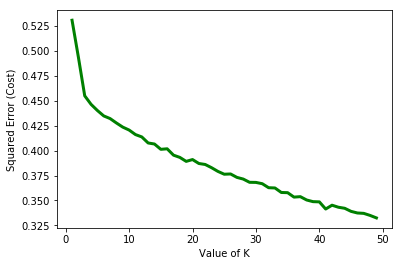

In [25]:

cost =[] 
for i in range(1,50): 
    KM = KMeans(n_clusters = i, max_iter = 500) 
    KM.fit_predict(pretrained_weights2) 
      
    # calculates squared error 
    # for the clustered points 
    cost.append(KM.inertia_)      
  
# plot the cost against K values 
plt.plot(range(1,50), cost, color ='g', linewidth ='3') 
plt.xlabel("Value of K") 
plt.ylabel("Squared Error (Cost)") 
plt.show() # clear the plot 

In [0]:
from sklearn.cluster import KMeans;
from sklearn.neighbors import KDTree;

centers, clusters = clustering_on_wordvecs(pretrained_weights2,12);
centroid_map = dict(zip(word_model2.wv.index2word, clusters));





In [27]:
!pip install comb

In [41]:
'''
import numpy as np
from scipy.special import comb

def rand_index_score(clusters, classes):

    tp_plus_fp = comb(np.bincount(clusters), 2).sum()
    tp_plus_fn = comb(np.bincount(classes), 2).sum()
    A = np.c_[(clusters, classes)]
    tp = sum(comb(np.bincount(A[A[:, 0] == i, 1]), 2).sum()
             for i in set(clusters))
    fp = tp_plus_fp - tp
    fn = tp_plus_fn - tp
    tn = comb(len(A), 2) - tp - fp - fn
    return (tp + tn) / (tp + fp + fn + tn)
  
print(rand_index_score(pretrained_weights2,clusters))  
'''

'\nimport numpy as np\nfrom scipy.special import comb\n\ndef rand_index_score(clusters, classes):\n\n    tp_plus_fp = comb(np.bincount(clusters), 2).sum()\n    tp_plus_fn = comb(np.bincount(classes), 2).sum()\n    A = np.c_[(clusters, classes)]\n    tp = sum(comb(np.bincount(A[A[:, 0] == i, 1]), 2).sum()\n             for i in set(clusters))\n    fp = tp_plus_fp - tp\n    fn = tp_plus_fn - tp\n    tn = comb(len(A), 2) - tp - fp - fn\n    return (tp + tn) / (tp + fp + fn + tn)\n  \nprint(rand_index_score(pretrained_weights2,clusters))  \n'

In [42]:
print(pretrained_weights2.shape)
print(clusters)

(363, 100)
[ 5  5  5  7  7  1  3  3  7  3  3  9  3  3  3  3  3  3  3  2 10 11  3 11
  8  8  8  8  8  8  8  8  8  8  8  9  4  6  4  2  9  3  2  2  9  2  7  7
  7  7  2  1 11  2  6  2  2  2  7  2  2  6  2  2  9 11 11 11  4  4  6 11
 11  1  1  1  2  7  3  6  6  7  7  7  7 11  7  7  4 11  7 11 11  3 11 11
  3 11 11 11 11 11 11 11 11 11  3  7 11  2 11  3 11  4  6  3  1  6  3  4
  3  3  3  6  3  2  6  1  7  6  3  3  3  3  3  4  3  3  3  3  7  4  4  4
  4  4  9  2  9  9  9  9  9  9  9  7  9  4  4  3  2  3  2  1  2  2  7 11
  6 11  6  6  6  6  6  6  6  6  6  6  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  9  0  0  9  9  9  9  9  9  4  2  7  9  3  3  3  3 11  4 11  3  3
  2  2  2  4  2  4  4  2  3  2  4  4  6  6  3  3  9  4  9  9  4  3  7  7
  7  2  7  7  7  7  7  7  7  2  6  0  6  4  6  6  4  4 11  9  4  6 11  4
 11  4  9  6  9  1  1  1  1  1  1  1  1  1  1  1  1  7  1 11  6  6  6  6
 11  6  4  6  9  4  3 10  9 10  6 10 10 10 10 10 10 10 10 10 10 10 10  9
  7  7  2  4  1  2  2  9  6  9 11  9  9 

In [54]:
print(centers.shape)
print(clusters)

dict2={}
for i in range(len(clusters)):
  dict2[all_genres[i]]=clusters[i]
  
print((dict2))  

(12, 100)
[ 4  4  3  3 10  5  0  0  3  0  0  0  0  0  0  0  0  0  0  5 10 10 10  8
 10 10 11  9 11  9  9  9 11 11 11  9 11  7  7 11  2  2  2  2  2  2  3  2
  2  3  2  2  9  2  2 10  2 10 10 10 11  5  7  7  9  9  9  9 11  7  7  9
  9  9  2  2  2  3  2  7  7  3  3  8  8  9  8  3  7  9  9  2  8  9  9  3
  9  9  6  9  9  9  9  9  3  9  9  3  9  2 10 10  6  6  6  6  6  6  6  6
  6  6  6  6  6 10  6  6  3 10  6  9  6 10  6  7  6 10  0  9  3  7  7 10
  7  2  9  2 10  9 10  1  3  1  3  3 10  7  7 10 10  9 11  7 11 11  9  3
  7  9  7  7 10  1  7 10  7  7  7  7  7  9  7  7  7  9  7  7  7  7  7  7
  9  7  9  9  7  9  9  9  9  9  9  5  8  8 10 11  9 11 10  3 11 11 11 11
 11 11 11 11 11 11  5 10 10 10  7  7 10 10 10 10 10  7 10  1 10  8  8  8
  8  8  8  8  8  8  8  2  3 11  7 10  7  7  7  7  7  7  9  9  7  7  9  7
 10  7  9 10 10 10  2 11  2  2  2  2  2  8  8  2  8  8  8  8  8  8  2  7
  8  2  5  7  9  7  9 11  9  5  7  5  5  5  5  5  5 10  5  5  5  5  5 10
  8  9  5 11  2 11  1  1  1  1  9  9  1  

In [55]:
genlabel=zip(all_genres,clusters)
genlabel=list(genlabel)
print(genlabel[0])

with open('parrot2.pkl', 'wb') as f:
  pickle.dump(genlabel, f)


('b-western', 4)


In [31]:
'''def get_top_words(index2word, k, centers, wordvecs):
    tree = KDTree(wordvecs);

#Closest points for each Cluster center is used to query the closest 20 points to it.
    closest_points = [tree.query(np.reshape(x, (1, -1)), k=k) for x in centers];
    closest_words_idxs = [x[1] for x in closest_points];

#Word Index is queried for each position in the above array, and added to a Dictionary.
    closest_words = {};
    for i in range(0, len(closest_words_idxs)):
        closest_words['Cluster #' + str(i)] = [index2word[j] for j in closest_words_idxs[i][0]]

#A DataFrame is generated from the dictionary.
    df = pd.DataFrame(closest_words);
    df.index = df.index+1

    return df;'''

"def get_top_words(index2word, k, centers, wordvecs):\n    tree = KDTree(wordvecs);\n\n#Closest points for each Cluster center is used to query the closest 20 points to it.\n    closest_points = [tree.query(np.reshape(x, (1, -1)), k=k) for x in centers];\n    closest_words_idxs = [x[1] for x in closest_points];\n\n#Word Index is queried for each position in the above array, and added to a Dictionary.\n    closest_words = {};\n    for i in range(0, len(closest_words_idxs)):\n        closest_words['Cluster #' + str(i)] = [index2word[j] for j in closest_words_idxs[i][0]]\n\n#A DataFrame is generated from the dictionary.\n    df = pd.DataFrame(closest_words);\n    df.index = df.index+1\n\n    return df;"

In [32]:
'''top_words = get_top_words(word_model2.wv.index2word,30, centers, pretrained_weights2);
print(top_words)
wc = WordCloud(background_color="black", max_words=2000, max_font_size=80, colormap='Blues');

for i in range(15):
  wordcloud = wc.generate(' '.join([word for word in top_words['Cluster #'+str(i)]]))
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.show()
  plt.axis("off")'''

'top_words = get_top_words(word_model2.wv.index2word,30, centers, pretrained_weights2);\nprint(top_words)\nwc = WordCloud(background_color="black", max_words=2000, max_font_size=80, colormap=\'Blues\');\n\nfor i in range(15):\n  wordcloud = wc.generate(\' \'.join([word for word in top_words[\'Cluster #\'+str(i)]]))\n  plt.imshow(wordcloud, interpolation=\'bilinear\')\n  plt.show()\n  plt.axis("off")'

In [33]:
'''list2=[]
for i in range(10):  
  list2.append(list(top_words['Cluster #'+str(i)]))
print('list2:0',list2[0])
print(len(list2))


list3=[]
for i in list2:
  
  l = [item.lower() for item in i]
  list3.append(l)
  
print('list3:',list3)
len(list3)'''

"list2=[]\nfor i in range(10):  \n  list2.append(list(top_words['Cluster #'+str(i)]))\nprint('list2:0',list2[0])\nprint(len(list2))\n\n\nlist3=[]\nfor i in list2:\n  \n  l = [item.lower() for item in i]\n  list3.append(l)\n  \nprint('list3:',list3)\nlen(list3)"

In [0]:
'''dict={}
print(len(all_genres))
all_genres=[x.lower() for x in all_genres]
print((all_genres))
#c=0
for i in all_genres:
  #print(c)

  for j in range(len(list3)):
    try:
      if i in list3[j]:
        
        dict[i]='Cluster'+str(j)
    except:
      continue
print(len(dict))'''

In [56]:
def funcone(x):
  y=[]
  for genre in x:
    try:
      y.append(dict2[genre])
    except:
      y.append(genre)
  return y


      
print(funcone(['hagiography','chase movie','outlaw','drama','comedy','sex','monster movie', 'romantic comedy', 'Chick flick']))      

[2, 0, 2, 10, 9, 'sex', 5, 6, 'Chick flick']


In [0]:
def func4(x):
  y=set(x)
  x=list(y)
  return x

In [58]:
movies_new1['genre_new']=movies_new1['genre_new'].apply(lambda x : funcone(x))
movies_new1['genre_new']=movies_new1['genre_new'].apply(lambda x : func4(x))
#movies_new.to_csv('DFupdated.csv')/
print(movies_new1['genre_new'])


0                        [10, 3]
1                    [11, 10, 2]
2                    [3, 10, 11]
3                         [9, 2]
4                        [10, 3]
5                    [11, 2, 10]
6                     [8, 2, 10]
7                        [10, 5]
8        [0, 3, 6, 8, 9, 10, 11]
9                      [8, 2, 7]
10                           [9]
11                    [9, 10, 3]
12                        [9, 7]
13             [0, 3, 7, 10, 11]
14                 [9, 11, 5, 6]
15                           [8]
16               [1, 2, 3, 7, 8]
17                          [10]
18             [2, 3, 8, 10, 11]
19                    [0, 10, 3]
20                       [10, 7]
21                 [8, 2, 11, 7]
22                          [10]
23                   [9, 10, 11]
24                          [10]
25                          [10]
27                    [9, 11, 7]
28                       [1, 10]
29                    [9, 10, 3]
30                   [9, 10, 11]
          

In [0]:
movies_new1.to_pickle('my_df2.pickle')